# Individual Task
# Victoria Rymchuk
## group UP-11
## 27.11.2022

# About Dataset
## It's a Kaggle Competition Dataset (Titanic ML competition)
## https://www.kaggle.com/competitions/titanic/

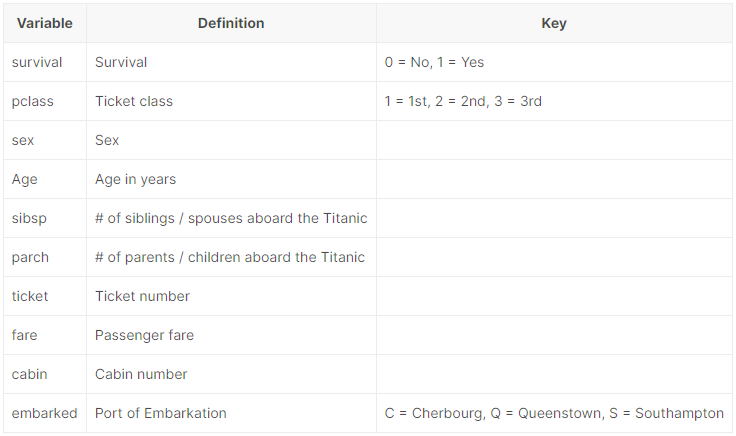

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## data reading

In [88]:
df = pd.read_csv('C:/Users/PC/Desktop/titanic/train.csv', index_col = 'PassengerId')

## data describe

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## number of missing value for each column

In [12]:
df.isnull().sum().sort_values(ascending = False)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [16]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [17]:
cat_cols = df.columns[~df.columns.isin(num_cols)]
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [23]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### numerical columns

In [24]:
df[num_cols].head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


### categorical columns

In [25]:
df[cat_cols].head()

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S


## number of unique values for each column

In [38]:
for i in df.columns:
    print(i, '', df[i].nunique())

Survived  2
Pclass  3
Name  891
Sex  2
Age  88
SibSp  7
Parch  7
Ticket  681
Fare  248
Cabin  147
Embarked  3


# We have missing values in two columns 
### Cabin  687 
### Age     177

## Fill df['Age'] with median value of the column

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())

## Let's handle with df['Cabin']  missings

In [5]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F33            3
              ..
C87            1
C148           1
D46            1
E31            1
B82 B84        1
Name: Cabin, Length: 147, dtype: int64

## Fill df['Cabin'] with 'No_info' value 

In [6]:
df['Cabin'].fillna('No_info', inplace = True)

In [7]:
df['Cabin'].value_counts()

No_info        687
G6               4
B96 B98          4
C23 C25 C27      4
F2               3
              ... 
C110             1
C87              1
C148             1
D46              1
B82 B84          1
Name: Cabin, Length: 148, dtype: int64

# Let's start data analysis

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No_info,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No_info,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No_info,S


### Lets start with numeric

In [18]:
df[num_cols].head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


### Actualy we have only two TRUE numeric columns: Age, Fare
### Other columns in fact is categorical

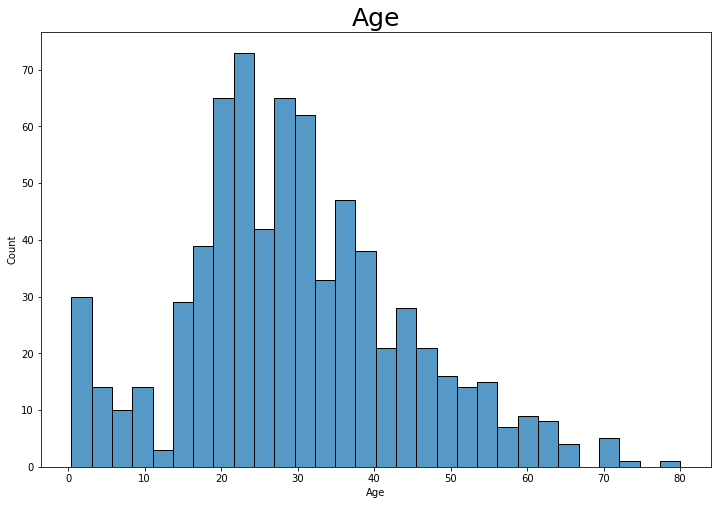

In [89]:
plt.figure(figsize=(12,8))
sns.histplot(df['Age'], bins= 30)
plt.title('Age', fontsize = 25)
plt.show()

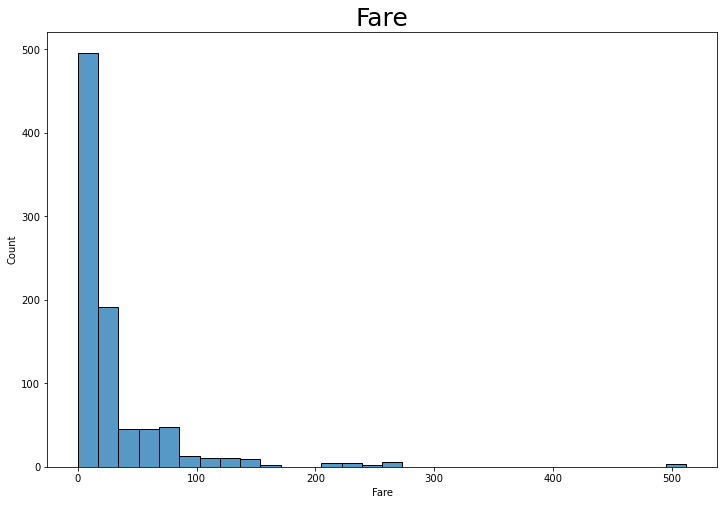

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(df['Fare'], bins= 30)
plt.title('Fare', fontsize = 25)
plt.show()

## Let's show correlations between numeric columns

In [78]:
df[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.096688
Fare,0.096688,1.000000


### weak correlation - 0.096

# categorical columns

In [42]:
df[num_cols].drop(columns = ['Age','Fare']).head()

,Survived,Pclass,SibSp,Parch
PassengerId,,,,
1,0,3,1,0
2,1,1,1,0
3,1,3,0,0
4,1,1,1,0
5,0,3,0,0


In [90]:
df['Pclass'] = df['Pclass'].map({1:'1st',2:'2st',3:'3st'})

In [91]:
df['Survived'] = df['Survived'].map({0:'No',1:'Yes'})

In [27]:
df[cat_cols].head()

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,No_info,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,No_info,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,No_info,S


In [50]:
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# Visualize categorical columns

## columns ['Name', 'Ticket', 'Cabin'] have many unique values, they are can't be visualized 

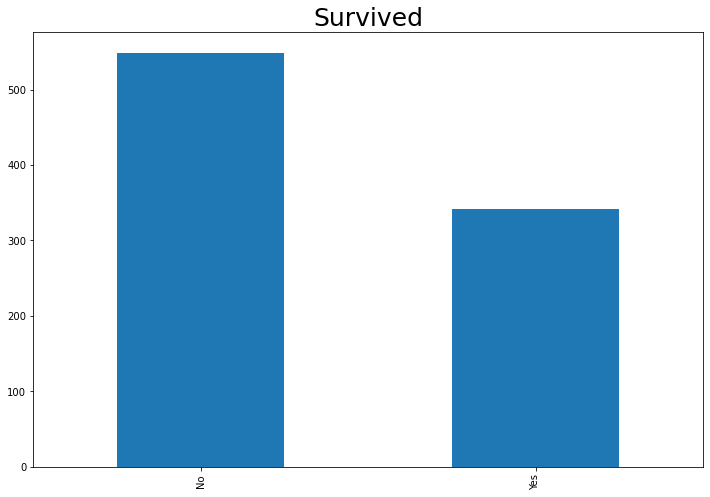

In [85]:
plt.figure(figsize=(12,8))
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survived', fontsize = 25)
plt.show()

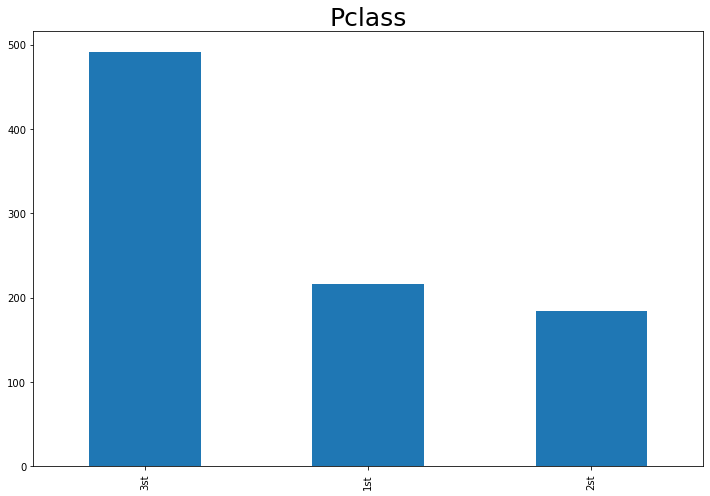

In [92]:
plt.figure(figsize=(12,8))
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Pclass', fontsize = 25)
plt.show()

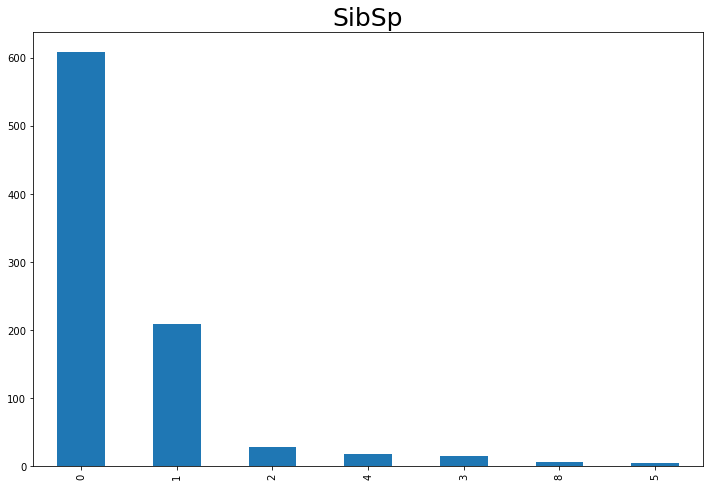

In [44]:
plt.figure(figsize=(12,8))
df['SibSp'].value_counts().plot(kind='bar')
plt.title('SibSp', fontsize = 25)
plt.show()

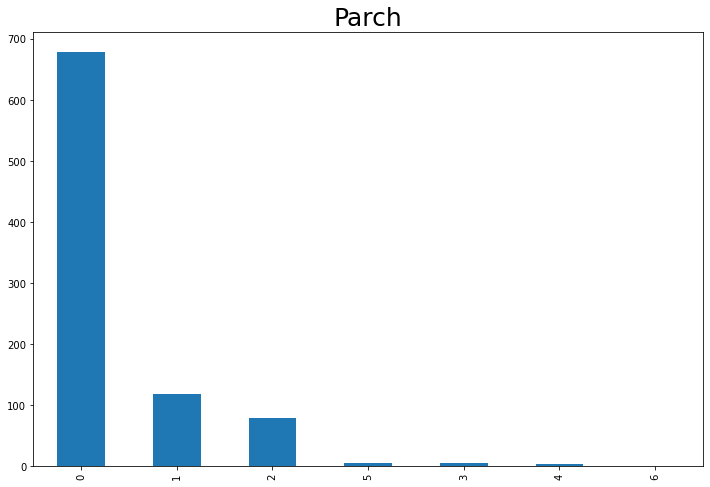

In [45]:
plt.figure(figsize=(12,8))
df['Parch'].value_counts().plot(kind='bar')
plt.title('Parch', fontsize = 25)
plt.show()

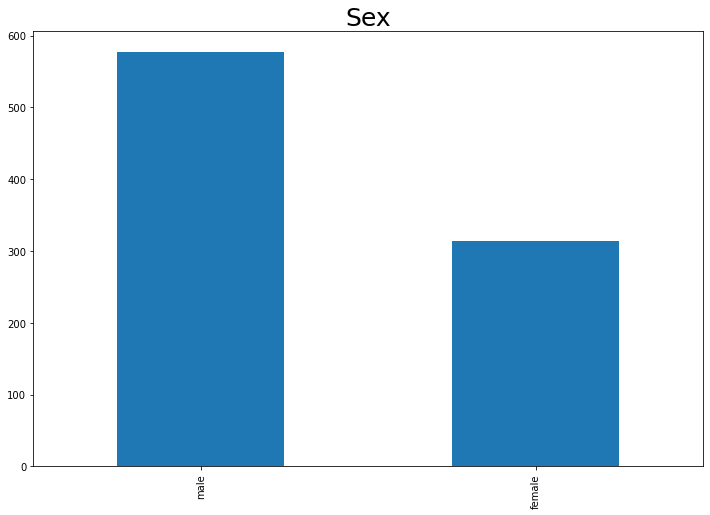

In [47]:
plt.figure(figsize=(12,8))
df['Sex'].value_counts().plot(kind='bar')
plt.title('Sex', fontsize = 25)
plt.show()

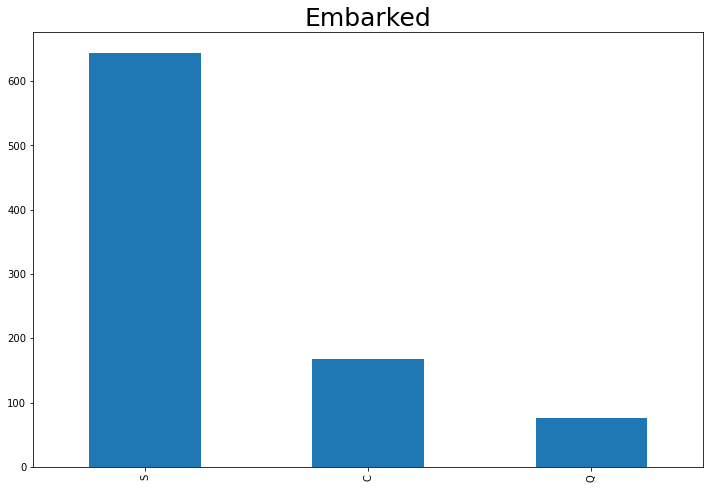

In [49]:
plt.figure(figsize=(12,8))
df['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarked', fontsize = 25)
plt.show()

# Visualize pair plots

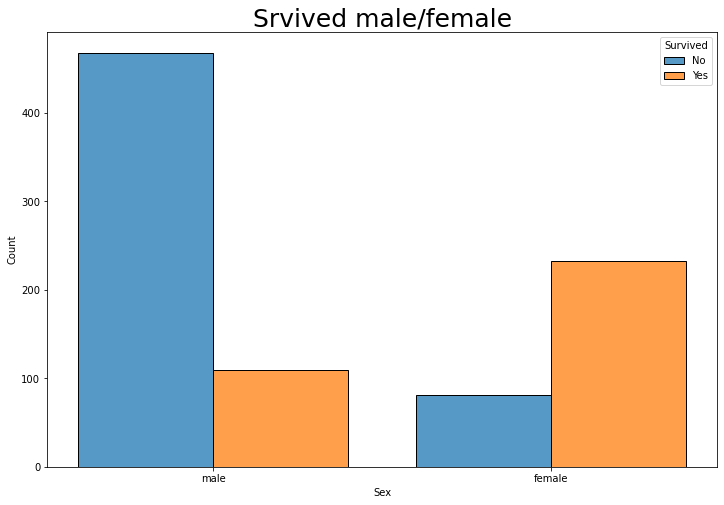

In [93]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="Sex", hue="Survived", multiple="dodge", shrink=.8)
plt.title('Srvived male/female', fontsize = 25)
plt.show()

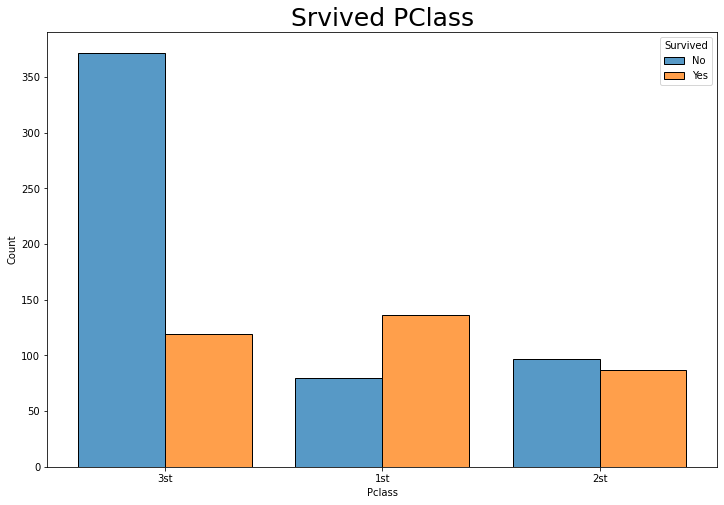

In [94]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="Pclass", hue="Survived", multiple="dodge", shrink=.8)
plt.title('Srvived PClass', fontsize = 25)
plt.show()

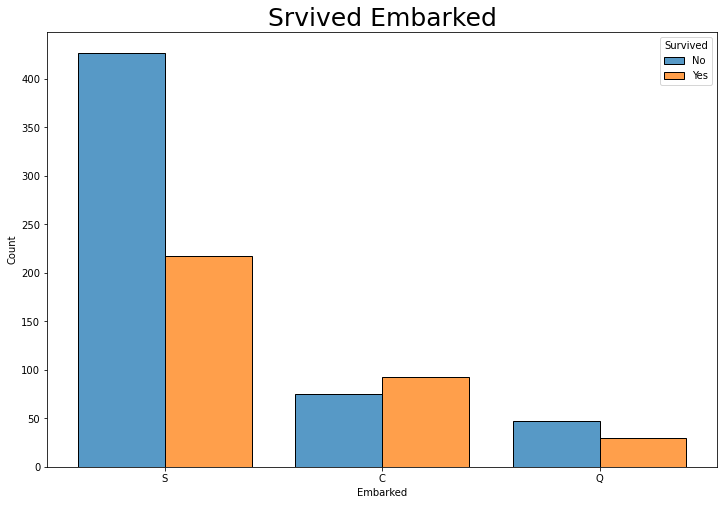

In [95]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="Embarked", hue="Survived", multiple="dodge", shrink=.8)
plt.title('Srvived Embarked', fontsize = 25)
plt.show()